# Cardiovascular Health Assessment and Risk Prediction Model Project 


**Index:**
 1. Problem statement
 2. Importing the libraries and the dataset
 3. Exploratory Data Analysis
 4. Data Visualization 
 5. Univariate and bivariate analysis
 6. Data Preprocessing
 7. Handling missing data
 8. Encoding Categorical Columns
 7. Feature selection
 8. Standardization
 9. Model Building
10. Model Selection
11. Conclusion And further Recommendation

## Problem Statement:
 - The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. 
 - The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). 
 - The dataset provides the patients’ information. It include over 3390 records and 16 attributes Variables. Each attribute is a potential risk factor. There are both demographic, behavioural, and medical risk factors.


## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Loading Data into Pandas Dataframe

In [2]:
data=pd.read_csv("data_cardiovascular_risk.csv")
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [3]:
#Making a copy of dataframe
df=data.copy()
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [4]:
print(f"There are {df.shape[0]} Rows, {df.shape[1]} Columns")

There are 3390 Rows, 17 Columns


## Exploratory Data Analysis

In [5]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### Data Overview
1. **Patient Age Distribution**:
   - The average age of the patients is approximately 50 years (49.54).
   - The youngest participant is 32 years old, while the oldest is 70.

2. **Need for Standardization**:
   - Each column has different ranges of values, indicating varied scales.
   - Standardizing the columns to a common scale is essential when building models to ensure consistency and prevent bias due to differing units.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

##### Dataset Consist of Numerical and categorical Features

In [7]:
numerical_features=["age", "cigsPerDay", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"]
categorical_features=["education", "sex", "is_smoking", "BPMeds", "prevalentStroke", "diabetes"]

print(f"Numerical Features are: {numerical_features}\nCategorical Features are: {categorical_features}")

Numerical Features are: ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
Categorical Features are: ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'diabetes']


## Data Visualisation and Analysis

### Visualising the Dependent Variable

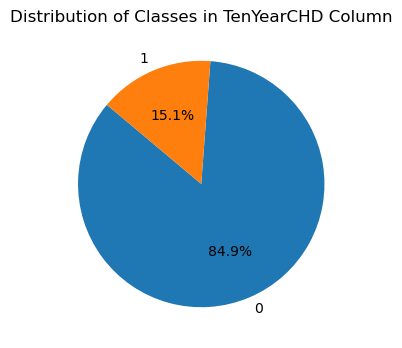

In [8]:
value_counts = df['TenYearCHD'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(4, 4))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Classes in TenYearCHD Column')
plt.show()

### Dataset exhibits class imbalance with 84.9% of 0 class and 15.1% of 1 class
This indicates the imbalance in the data set, majority of the data belongs to 0 category and 1 category remians the minority. This problem  would lead to the bad performance of the model due to the over representation of the 0 data and it might lead to bias towards 0 category therefore the imbalance is to be treated before training machine learning model

### Gender Distribution of the patients

In [9]:
Gender_dist = df['sex'].value_counts()
Gender_dist

F    1923
M    1467
Name: sex, dtype: int64

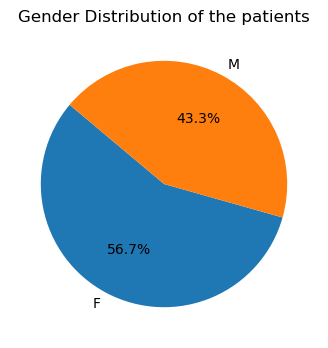

In [10]:
# Plotting a pie chart
plt.figure(figsize=(4, 4))
plt.pie(Gender_dist, labels=Gender_dist.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution of the patients')
plt.show()

#### Pie Chart suggests that there are more occurrences of female than male in the dataset. This suggests that the dataset may be biased towards Females which might produce results bised towarda female

### The gender distribution of patient based on their age

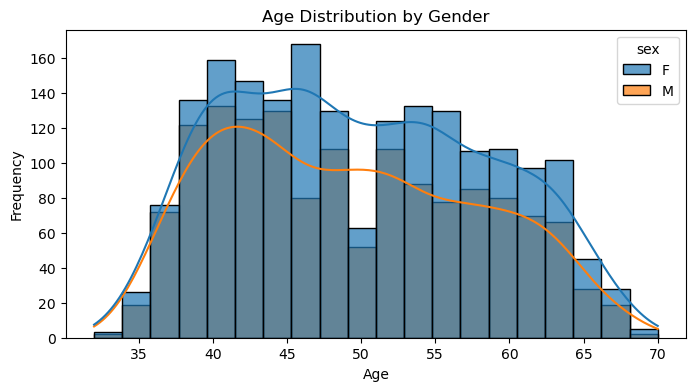

In [11]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='age', hue='sex', bins=20, kde=True, alpha=0.7)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend
plt.show()

#### Age Distribution by Gender Insights

1. **Female Dominance**:
   - Females consistently outnumber males across all age groups.
   - The trend is most pronounced around the age of 45, where the female frequency reaches its peak.

2. **Male Distribution**:
   - Males exhibit a more even distribution compared to females.
   - The male frequency starts to decline noticeably after the age of 50

## Gender Distribution with Respect to Target

TenYearCHD     0    1
sex                  
F           1684  239
M           1195  272


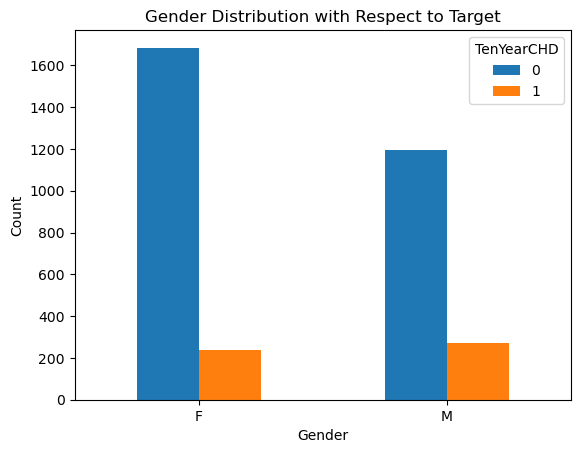

In [12]:
grouped = df.groupby(['sex', 'TenYearCHD']).size().unstack(fill_value=0)
print(grouped)
# Plot bar plot
grouped.plot(kind='bar')
plt.title('Gender Distribution with Respect to Target')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='TenYearCHD')
plt.show()

### TenYearCHD Risk by Gender

- **Females (F)**
  - The majority (1,684 females) have a TenYearCHD value of 0, indicating no risk of cardiovascular disease in the next 10 years.
  - A smaller group (239 females) have a TenYearCHD value of 1, indicating a risk of developing cardiovascular disease.

- **Males (M)**
  - There are fewer males with a TenYearCHD value of 0 (1,195) compared to females.
  - A higher proportion of males (272) have a TenYearCHD value of 1, indicating an increased risk of cardiovascular disease.
  
while more females have no risk (TenYearCHD = 0), a higher proportion of males face a risk of cardiovascular disease (TenYearCHD = 1). It’s essential to monitor risk factors and take preventive measures to maintain heart health.

## is_smoking Distribution with Respect to Target column

TenYearCHD     0    1
is_smoking           
NO          1467  236
YES         1412  275


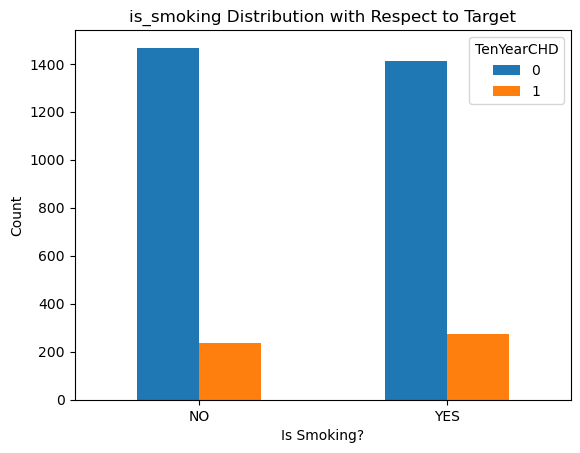

In [13]:
grouped = df.groupby(['is_smoking', 'TenYearCHD']).size().unstack(fill_value=0)
print(grouped)
# Plot bar plot
grouped.plot(kind='bar')
plt.title('is_smoking Distribution with Respect to Target')
plt.xlabel('Is Smoking?')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='TenYearCHD')
plt.show()

### TenYearCHD Risk by Smoking Status

- **Non-Smokers (NO)**
  - The majority of non-smokers (1,467) have a TenYearCHD value of 0, indicating no risk of CVD in the next 10 years.
  - A smaller group of non-smokers (236) have a TenYearCHD value of 1, indicating risk of developing CVD.

- **Smokers (YES)**
  - There are fewer smokers with a TenYearCHD value of 0 (1,412) compared to non-smokers.
  - A slightly higher proportion of smokers (275) have a TenYearCHD value of 1, indicating an increased risk of CVD.


   While more non-smokers have no risk of CHD (TenYearCHD = 0), the proportion of smokers with CVD risk is slightly higher than that of non-smokers. It's crucial to consider Quit smoking  and heart-healthy lifestyle choices to reduce cardiovascular risk.


## Univariate analysis on Numerical features

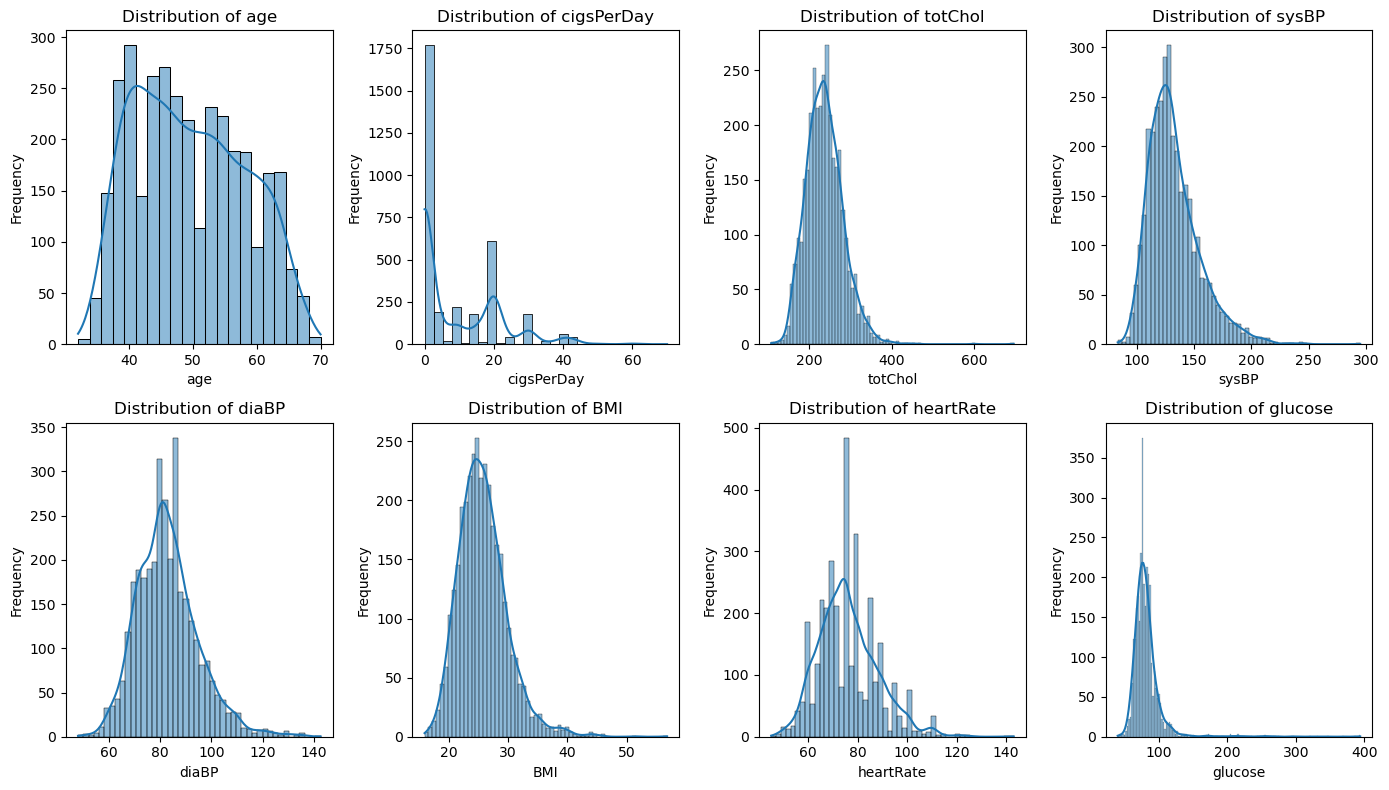

In [14]:
columns_to_plot = ["age", "cigsPerDay", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"]

# Creating a 2x4 grid of subplots
fig, axes = plt.subplots(2, 4, figsize=(14, 8))  # Adjust figsize as needed

# Plotting each feature
for i, column in enumerate(columns_to_plot):
    row = i // 4
    col = i % 4
    sns.histplot(df[column], kde=True, ax=axes[row, col])  # KDE for Kernel Density Estimation
    axes[row, col].set_title(f"Distribution of {column}")
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()

From the above distribution it is clear that most of the features have skewed distribution

## Bivariate analysis on numerical features

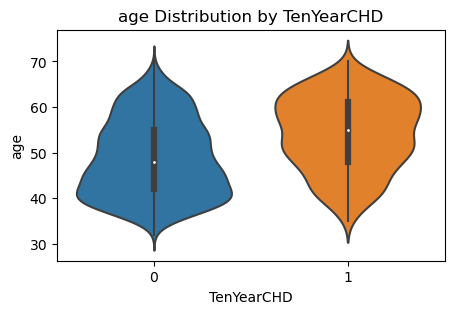

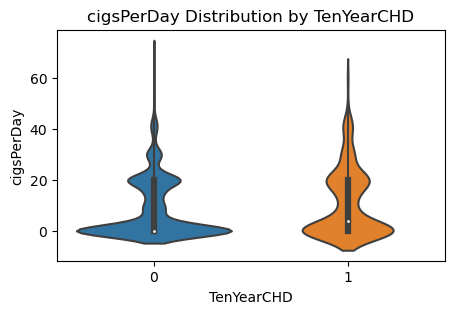

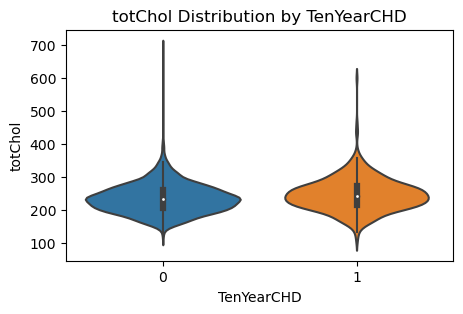

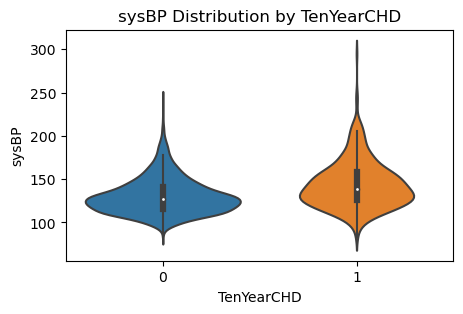

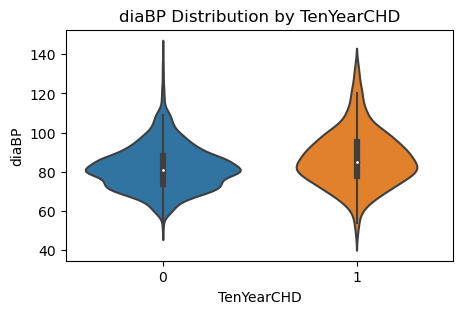

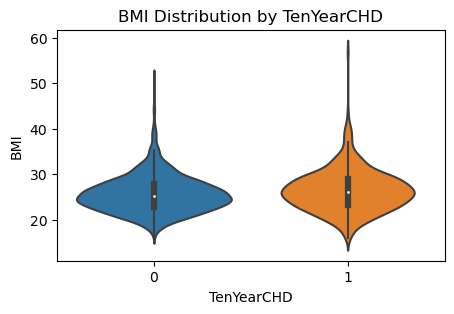

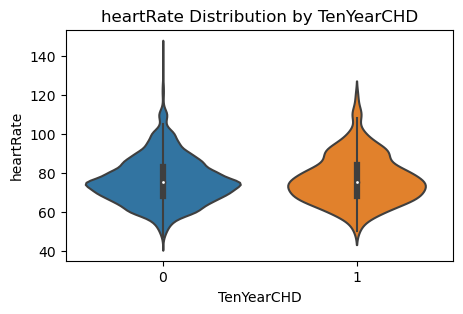

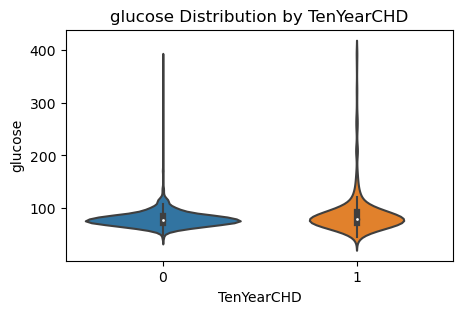

In [15]:
columns_to_plot = ["age", "cigsPerDay", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"]

# Define the target column
target_column = "TenYearCHD"

# Loop through the columns and create scatter plots against the target
for col in columns_to_plot:
    plt.figure(figsize=(5, 3))
    sns.violinplot(data=df, x=target_column, y=col)
    plt.title(f'{col} Distribution by {target_column}')
    plt.xlabel(target_column)
    plt.ylabel(col)
    plt.show()

 **Summary:**
  - Risk of CVD is more for elder patients than youngerpatients
  -  Individuals with a TenYearCHD value of 1 tend to smoke more cigarettes than those with a TenYearCHD value of 0. This suggests that smoking is associated with an increased risk of cardiovascular disease in the next decade. 🚬🫀
  -  Although both groups have a similar range, the median cholesterol level appears higher in the TenYearCHD = 1 group, indicating a potential association between elevated cholesterol and increased cardiovascular risk.
  - The higher median sysBP and diaBP in the TenYearCHD = 1 group suggests a potential association between elevated blood pressure and increased cardiovascular risk.

## Data Preprocessing

### Missing Values in each column

In [16]:
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

### % Missing values in each column

In [17]:
df.isnull().sum()/len(data)*100

id                 0.000000
age                0.000000
education          2.566372
sex                0.000000
is_smoking         0.000000
cigsPerDay         0.648968
BPMeds             1.297935
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.120944
sysBP              0.000000
diaBP              0.000000
BMI                0.412979
heartRate          0.029499
glucose            8.967552
TenYearCHD         0.000000
dtype: float64

#### Missing Values in each column are less than 10% we can replace them with the median value for numerical features and mode for categorical features

In [18]:
# Treating missing values in education column with mode as it is a ordinal categorical column
mode_education = df['education'].mode()[0]

# Replace missing values with the mode
df['education'].fillna(mode_education, inplace=True)

In [19]:
# Treating missing values in BPMeds column with mode as it is a nominal categorical column
mode_BPMeds = df['BPMeds'].mode()[0]

# Replace missing values with the mode
df['BPMeds'].fillna(mode_BPMeds, inplace=True)

In [20]:
# Treating missing values in cigsPerDay column with median as it is a continues Numerical column
median_cigsPerDay = df['cigsPerDay'].median()

# Replace missing values with the median
df['cigsPerDay'].fillna(median_cigsPerDay, inplace=True)

In [21]:
# Treating missing values in totChol column with median as it is a continues Numerical column
median_totChol = df['totChol'].median()

# Replace missing values with the median
df['totChol'].fillna(median_totChol, inplace=True)

In [22]:
# Treating missing values in BMI column with median as it is a continues Numerical column
median_BMI = df['BMI'].median()

# Replace missing values with the median
df['BMI'].fillna(median_BMI, inplace=True)

In [23]:
# Treating missing values in heartRate column with median as it is a continues Numerical column
median_heartRate = df['heartRate'].median()

# Replace missing values with the median
df['heartRate'].fillna(median_heartRate, inplace=True)

In [24]:
# Treating missing values in glucose column with median as it is a continues Numerical column
median_glucose = df['glucose'].median()

# Replace missing values with the median
df['glucose'].fillna(median_glucose, inplace=True)

In [25]:
df.isnull().sum()/len(data)*100

id                 0.0
age                0.0
education          0.0
sex                0.0
is_smoking         0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            0.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
TenYearCHD         0.0
dtype: float64

#### Successfully treated the Missing Values

## Encoding categorical columns 

In [26]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [27]:
# Encoding sex column with Label encoder 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])
df.head() #0-Female, 1-Male

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,0,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,1,36,4.0,1,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,0,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,1,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,0,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [28]:
# Encoding is_smoking column with Label encoder 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['is_smoking']=le.fit_transform(df['is_smoking'])
df.head()# yes-1, no-0

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


## Feature Selection:
Droping insignificant Features and Selecting Significant ones

In [29]:
# Dropping 'id' column as it doesnt provide any information it is just a serial number
df.drop('id',axis=1,inplace=True)
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Check for Zero Variance Colums

In [30]:
zero_variance_cols = []
for col in df.columns:
    if df[col].nunique() == 1:
        zero_variance_cols.append(col)
print(zero_variance_cols)
print(f'There are {len(zero_variance_cols)} columns with Zero Variance')

[]
There are 0 columns with Zero Variance


## Chi-2 Test for Categorical Features

In [31]:
print(f"Numerical Features are: {numerical_features}\nCategorical Features are: {categorical_features}")

Numerical Features are: ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
Categorical Features are: ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'diabetes']


In [32]:
from scipy.stats import chi2_contingency

# Dictionary to store p-values for each feature
chi2_results = {}

# Perform Chi-Square test for each feature against the target
for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['TenYearCHD'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results[feature] = {
        'chi2': chi2,
        'p-value': p,
        'degrees_of_freedom': dof,
        'expected': expected
    }

# Display p-values to determine if a feature is significant
for feature, results in chi2_results.items():
    print(f"Feature: {feature}")
    print(f"  Chi-Square Statistic: {results['chi2']}")
    print(f"  P-value: {results['p-value']}")
    

# Identify significant features based on p-value threshold
significant_features = [feature for feature, results in chi2_results.items() if results['p-value'] < 0.05]
insignificant_features = [feature for feature, results in chi2_results.items() if results['p-value'] >= 0.05]

print("Significant Features (p-value < 0.05):", significant_features)
print("Inignificant Features (p-value >= 0.05):", insignificant_features)

Feature: education
  Chi-Square Statistic: 21.400065537300264
  P-value: 8.69389071714776e-05
Feature: sex
  Chi-Square Statistic: 23.814363915594157
  P-value: 1.060878293561798e-06
Feature: is_smoking
  Chi-Square Statistic: 3.763250993795598
  P-value: 0.05239062274853224
Feature: BPMeds
  Chi-Square Statistic: 24.442672895212937
  P-value: 7.6554102539106e-07
Feature: prevalentStroke
  Chi-Square Statistic: 13.666246132442092
  P-value: 0.0002183439934300794
Feature: diabetes
  Chi-Square Statistic: 34.63203270914867
  P-value: 3.982978687382329e-09
Significant Features (p-value < 0.05): ['education', 'sex', 'BPMeds', 'prevalentStroke', 'diabetes']
Inignificant Features (p-value >= 0.05): ['is_smoking']


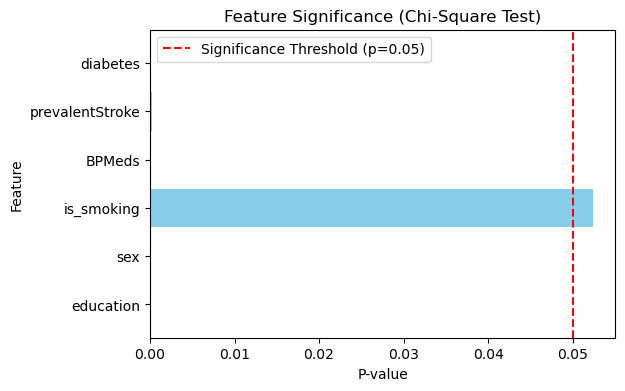

In [33]:
features = list(chi2_results.keys())
p_values = [results['p-value'] for results in chi2_results.values()]

# Plot feature names against p-values
plt.figure(figsize=(6, 4))
plt.barh(features, p_values, color='skyblue')
plt.xlabel('P-value')
plt.ylabel('Feature')
plt.title('Feature Significance (Chi-Square Test)')
plt.axvline(x=0.05, color='red', linestyle='--', label='Significance Threshold (p=0.05)')
plt.legend()

In [34]:
# Droping 'is_smoking' column as it is insignificant with respect to chi-2 test
df.drop('is_smoking',axis=1,inplace=True)
df.head()

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,0,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,4.0,1,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,0,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,0,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


## Variance Inflation Factor(VIF):
Detecting Multicolinearity among numerical Features

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# List of feature names for which you want to calculate VIF
features =['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = features
vif_data['VIF'] = [variance_inflation_factor(df[features].values, i) for i in range(len(features))]

vif_data.head(10)

,feature,VIF
0,age,40.116552
1,cigsPerDay,1.612286
2,totChol,29.920583
3,sysBP,109.136019
4,diaBP,124.172050
5,BMI,43.143593
6,heartRate,35.235826
7,glucose,13.417479


To handle multicollinearity between sysBP and diaBP , we can replace these two columns with a new variable 'pulse pressure', which is given as follows: It is the difference between the systolic blood pressure (SBP) and diastolic blood pressure (DBP). Mathematically,

**Pulse Pressure = Systolic BP - Diastolic BP**

In [36]:
df['pulseBP']=df['sysBP']-df['diaBP']
df.drop(columns=['sysBP','diaBP',],axis=1,inplace=True)
df.head()

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,pulseBP
0,64,2.0,0,3.0,0.0,0,0,0,221.0,25.38,90.0,80.0,1,63.0
1,36,4.0,1,0.0,0.0,0,1,0,212.0,29.77,72.0,75.0,0,70.0
2,46,1.0,0,10.0,0.0,0,0,0,250.0,20.35,88.0,94.0,0,45.0
3,50,1.0,1,20.0,0.0,0,1,0,233.0,28.26,68.0,94.0,1,70.0
4,64,1.0,0,30.0,0.0,0,0,0,241.0,26.42,70.0,77.0,0,51.5


In [37]:
df.shape

(3390, 14)

## Correlation Matrix

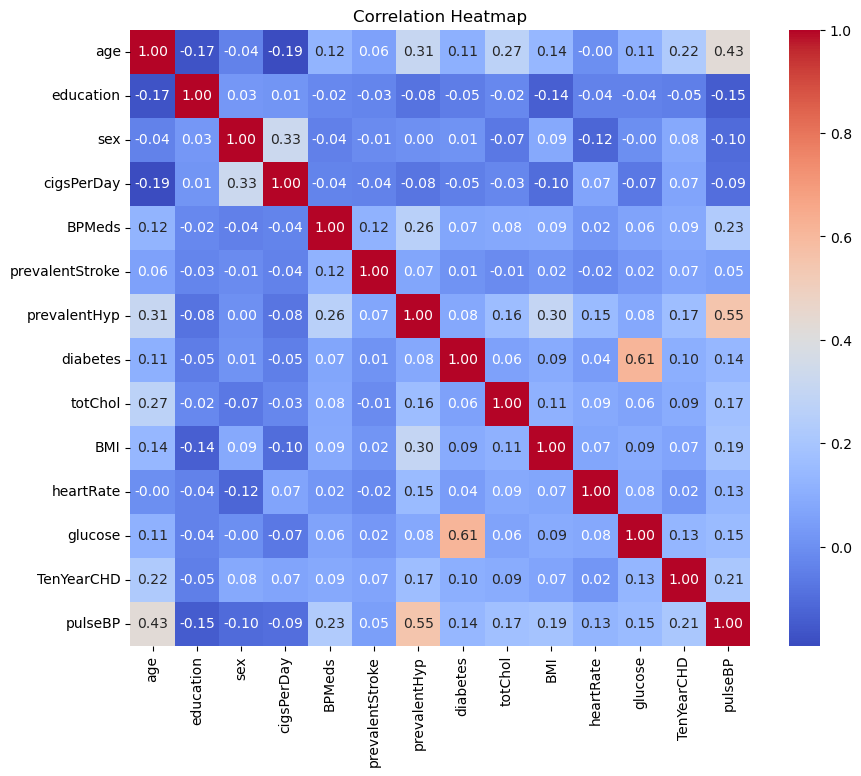

In [38]:
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [39]:
df.head()

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,pulseBP
0,64,2.0,0,3.0,0.0,0,0,0,221.0,25.38,90.0,80.0,1,63.0
1,36,4.0,1,0.0,0.0,0,1,0,212.0,29.77,72.0,75.0,0,70.0
2,46,1.0,0,10.0,0.0,0,0,0,250.0,20.35,88.0,94.0,0,45.0
3,50,1.0,1,20.0,0.0,0,1,0,233.0,28.26,68.0,94.0,1,70.0
4,64,1.0,0,30.0,0.0,0,0,0,241.0,26.42,70.0,77.0,0,51.5


#### Glucose and Diabetes: These two features are highly correlated (0.61). This suggests that there might be redundancy between them. Given that glucose is a continuous numerical feature , it might contain more granular information compared to the binary diabetes feature. 

In [40]:
# Removing 'diabetes' would reduce the risk of multicolinearity 
df.drop('diabetes',axis=1,inplace=True)

In [41]:
print(df.shape)
df.head()

(3390, 13)


,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,BMI,heartRate,glucose,TenYearCHD,pulseBP
0,64,2.0,0,3.0,0.0,0,0,221.0,25.38,90.0,80.0,1,63.0
1,36,4.0,1,0.0,0.0,0,1,212.0,29.77,72.0,75.0,0,70.0
2,46,1.0,0,10.0,0.0,0,0,250.0,20.35,88.0,94.0,0,45.0
3,50,1.0,1,20.0,0.0,0,1,233.0,28.26,68.0,94.0,1,70.0
4,64,1.0,0,30.0,0.0,0,0,241.0,26.42,70.0,77.0,0,51.5


### Skewness 

In [42]:
# Check for skewness in Continuous Numerical features
num_features = ['age', 'cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose', 'pulseBP']

# Calculate skewness
skewness = df[num_features].skew()

# Create a DataFrame to store the results
skewness_df = pd.DataFrame({'Feature': skewness.index, 'Skewness': skewness.values})

# Print the skewness table
skewness_df.head(10)

,Feature,Skewness
0,age,0.225796
1,cigsPerDay,1.232049
2,totChol,0.948170
3,BMI,1.025551
4,heartRate,0.676660
5,glucose,6.462108
6,pulseBP,1.412382


In [43]:
# Lets transform the features using square root  transformation to reduce skewness as some columns have 0 value
num_features = ['age', 'cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose', 'pulseBP']

# Apply log10 transformation to selected columns
df[num_features] = df[num_features].apply(np.log10)

# Display the transformed DataFrame
df.head()

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,BMI,heartRate,glucose,TenYearCHD,pulseBP
0,1.806180,2.0,0,0.477121,0.0,0,0,2.344392,1.404492,1.954243,1.903090,1,1.799341
1,1.556303,4.0,1,-inf,0.0,0,1,2.326336,1.473779,1.857332,1.875061,0,1.845098
2,1.662758,1.0,0,1.000000,0.0,0,0,2.397940,1.308564,1.944483,1.973128,0,1.653213
3,1.698970,1.0,1,1.301030,0.0,0,1,2.367356,1.451172,1.832509,1.973128,1,1.845098
4,1.806180,1.0,0,1.477121,0.0,0,0,2.382017,1.421933,1.845098,1.886491,0,1.711807


We are getting -inf because 0s in the columns lets replace them with 0

In [44]:
df.replace(-np.inf, np.nan, inplace=True)

# Replace NaN values with 0
df.fillna(0, inplace=True)
df.head()

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,BMI,heartRate,glucose,TenYearCHD,pulseBP
0,1.806180,2.0,0,0.477121,0.0,0,0,2.344392,1.404492,1.954243,1.903090,1,1.799341
1,1.556303,4.0,1,0.000000,0.0,0,1,2.326336,1.473779,1.857332,1.875061,0,1.845098
2,1.662758,1.0,0,1.000000,0.0,0,0,2.397940,1.308564,1.944483,1.973128,0,1.653213
3,1.698970,1.0,1,1.301030,0.0,0,1,2.367356,1.451172,1.832509,1.973128,1,1.845098
4,1.806180,1.0,0,1.477121,0.0,0,0,2.382017,1.421933,1.845098,1.886491,0,1.711807


In [45]:
#Skewness after transformation
num_features = ['age', 'cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose', 'pulseBP']

# Calculate skewness
skewness = df[num_features].skew()

# Create a DataFrame to store the results
skewness_df = pd.DataFrame({'Feature': skewness.index, 'Skewness': skewness.values})

# Print the skewness table
skewness_df.head(10)

,Feature,Skewness
0,age,-0.020114
1,cigsPerDay,0.348739
2,totChol,0.008808
3,BMI,0.349126
4,heartRate,0.159481
5,glucose,2.385747
6,pulseBP,0.334093


In [46]:
skewness

age          -0.020114
cigsPerDay    0.348739
totChol       0.008808
BMI           0.349126
heartRate     0.159481
glucose       2.385747
pulseBP       0.334093
dtype: float64

In [47]:
-0.020114
0.348739
0.008808        
0.349126
0.159481
2.385747
0.334093

0.334093

## Sepearting Dependent and independet Variables

In [48]:
X=df.drop('TenYearCHD',axis=1)
y=df[["TenYearCHD"]]
X.head()

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,BMI,heartRate,glucose,pulseBP
0,1.806180,2.0,0,0.477121,0.0,0,0,2.344392,1.404492,1.954243,1.903090,1.799341
1,1.556303,4.0,1,0.000000,0.0,0,1,2.326336,1.473779,1.857332,1.875061,1.845098
2,1.662758,1.0,0,1.000000,0.0,0,0,2.397940,1.308564,1.944483,1.973128,1.653213
3,1.698970,1.0,1,1.301030,0.0,0,1,2.367356,1.451172,1.832509,1.973128,1.845098
4,1.806180,1.0,0,1.477121,0.0,0,0,2.382017,1.421933,1.845098,1.886491,1.711807


In [49]:
y.head()

,TenYearCHD
0,1
1,0
2,0
3,1
4,0


## Train-Test-Split

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set - Features:", X_train.shape, "TenYearCHD:", y_train.shape)
print("Test set - Features:", X_test.shape, "TenYearCHD:", y_test.shape)

Training set - Features: (2712, 12) TenYearCHD: (2712, 1)
Test set - Features: (678, 12) TenYearCHD: (678, 1)


In [51]:
X_train.head()

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,BMI,heartRate,glucose,pulseBP
2378,1.819544,1.0,0,0.00000,1.0,0,1,2.462398,1.373464,1.903090,1.880814,1.795880
3182,1.724276,1.0,0,0.00000,0.0,0,1,2.426511,1.454692,1.973128,2.012837,1.799341
921,1.662758,3.0,0,1.30103,0.0,0,0,2.413300,1.360025,1.819544,1.924279,1.662758
2244,1.602060,1.0,0,1.69897,0.0,0,0,2.342423,1.315970,1.954243,1.755875,1.653213
3131,1.707570,2.0,0,0.00000,0.0,0,0,2.369216,1.457579,1.857332,1.924279,1.462398


In [52]:
y_train.value_counts()

TenYearCHD
0             2298
1              414
dtype: int64

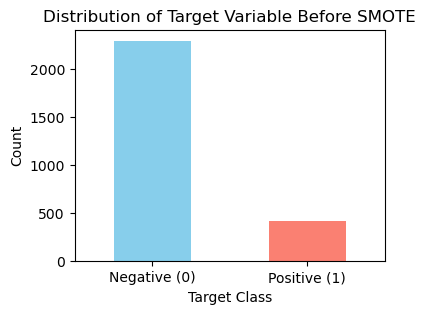

In [53]:
class_counts = y_train.value_counts()

# Plot the bar chart
plt.figure(figsize=(4, 3))
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Target Variable Before SMOTE')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative (0)', 'Positive (1)'], rotation=0)
plt.show()

In [54]:
y_test.value_counts()

TenYearCHD
0             581
1              97
dtype: int64

#### We have a highly imbalanced Data set we need to balance it before training model

## Balancing Dataset

In [55]:
#Lets Baalance Dataset using SMOTE method
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)
print("After SMOTE:")
print(y_train.value_counts())

After SMOTE:
TenYearCHD
0             2298
1             2298
dtype: int64


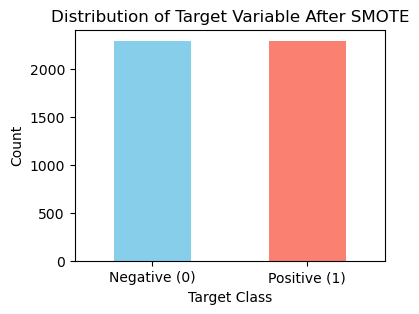

In [56]:
class_counts = y_train.value_counts()

# Plot the bar chart
plt.figure(figsize=(4, 3))
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Target Variable After SMOTE')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative (0)', 'Positive (1)'], rotation=0)
plt.show()

The training data is balanced now

In [57]:
X_train.head()

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,BMI,heartRate,glucose,pulseBP
0,1.819544,1.0,0,0.00000,1.0,0,1,2.462398,1.373464,1.903090,1.880814,1.795880
1,1.724276,1.0,0,0.00000,0.0,0,1,2.426511,1.454692,1.973128,2.012837,1.799341
2,1.662758,3.0,0,1.30103,0.0,0,0,2.413300,1.360025,1.819544,1.924279,1.662758
3,1.602060,1.0,0,1.69897,0.0,0,0,2.342423,1.315970,1.954243,1.755875,1.653213
4,1.707570,2.0,0,0.00000,0.0,0,0,2.369216,1.457579,1.857332,1.924279,1.462398


In [58]:
# Seperating Numerical columns and Categorical Columns

#Numerical
X_train_numerical=X_train[['age',"cigsPerDay","totChol","BMI","heartRate","glucose","pulseBP"]]
X_test_numerical=X_test[['age',"cigsPerDay","totChol","BMI","heartRate","glucose","pulseBP"]]

#Caetgorical
X_train_categorical=X_train[["education","sex","BPMeds","prevalentStroke"]]
X_test_categorical=X_test[["education","sex","BPMeds","prevalentStroke"]]

In [59]:
X_train_numerical.head()

,age,cigsPerDay,totChol,BMI,heartRate,glucose,pulseBP
0,1.819544,0.00000,2.462398,1.373464,1.903090,1.880814,1.795880
1,1.724276,0.00000,2.426511,1.454692,1.973128,2.012837,1.799341
2,1.662758,1.30103,2.413300,1.360025,1.819544,1.924279,1.662758
3,1.602060,1.69897,2.342423,1.315970,1.954243,1.755875,1.653213
4,1.707570,0.00000,2.369216,1.457579,1.857332,1.924279,1.462398


In [60]:
X_train_categorical.head()

,education,sex,BPMeds,prevalentStroke
0,1.0,0,1.0,0
1,1.0,0,0.0,0
2,3.0,0,0.0,0
3,1.0,0,0.0,0
4,2.0,0,0.0,0


## Standardization

In [61]:
# Standardising Numerical features using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_numerical_scaled=scaler.fit_transform(X_train_numerical)
X_test_numerical_scaled=scaler.transform(X_test_numerical)

In [62]:
#Concatenating scaled numerical features with categorical features of train data
X_train = pd.concat([pd.DataFrame(X_train_numerical_scaled, columns=X_train_numerical.columns), X_train_categorical.reset_index(drop=True)], axis=1)
print(X_train.shape)
X_train.head()

(4596, 11)


,age,cigsPerDay,totChol,BMI,heartRate,glucose,pulseBP,education,sex,BPMeds,prevalentStroke
0,1.560874,-0.927986,1.138374,-0.607130,0.441458,-0.299060,0.752381,1.0,0,1.0,0
1,0.243171,-0.927986,0.666734,0.685865,1.567393,1.136757,0.781046,1.0,0,0.0,0
2,-0.607718,1.090705,0.493102,-0.821046,-0.901637,0.173649,-0.350328,3.0,0,0.0,0
3,-1.447262,1.708152,-0.438397,-1.522307,1.263790,-1.657825,-0.429396,1.0,0,0.0,0
4,0.012106,-0.927986,-0.086269,0.731816,-0.294144,0.173649,-2.009995,2.0,0,0.0,0


In [63]:
#Concatenating scaled numerical features with categorical features of test data
X_test = pd.concat([pd.DataFrame(X_test_numerical_scaled, columns=X_test_numerical.columns), X_test_categorical.reset_index(drop=True)], axis=1)
X_test.head()

,age,cigsPerDay,totChol,BMI,heartRate,glucose,pulseBP,education,sex,BPMeds,prevalentStroke
0,1.376030,-0.927986,0.558835,0.187908,0.864724,3.586006,0.421000,1.0,0,0.0,0
1,-2.080158,1.090705,0.245392,2.402431,-1.008230,0.229545,-0.808425,2.0,1,0.0,0
2,1.087641,0.800419,1.555734,0.127669,-0.693210,0.804338,-0.510241,1.0,1,0.0,0
3,0.012106,-0.927986,-0.110713,0.627383,0.441458,-0.361619,-0.944194,2.0,0,0.0,0
4,0.887390,1.090705,-0.135262,0.286298,-0.693210,-0.755443,-0.720678,4.0,1,0.0,0


# Training Model with Various Algorithms

## Choice of prediction model:**

* We are working on binary classification problem.
* Here we can start with a simple model, as a baseline model, which is interpretable, ie, Logistic Regression
* Try other standard binary classification models like  K nearest neighbors, and support vector machines.
* Use ensemble models, with hyperparameter tuning to check whether they give better predictions.

##  Choice of Evaluation metrics:
* Since the data we are dealing with is highly imbalanced, accuracy may not be the best evaluation metric to evaluate the model performance.
* Also, since we are dealing with data related to healthcare, False Negatives are of higher concern than False Positive In other words, it doesn’t matter whether we raise a false alarm but the actual positive cases should not go undetected
* Considering these points in mind, it is decided that we use **Recall** as the model evaluation metric.


\begin{align}
        Recall = \frac{True Positive}{True Positive + False Negative}
    \end{align}

# Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()

# Training model
LR.fit(X_train,y_train)

# Predicting
y_pred_train = LR.predict(X_train)
y_pred_test = LR.predict(X_test)

### Evaluating the LR model

In [65]:
# with accuracy Score
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, classification_report

LR_train_accu = accuracy_score(y_train,y_pred_train)

LR_test_accu =  accuracy_score(y_test,y_pred_test)

print("Logistic Regression Training Data Accuracy : ",LR_train_accu )
print("Logistic Regression Testing Data Accuracy : ",LR_test_accu )

Logistic Regression Training Data Accuracy :  0.6786335944299391
Logistic Regression Testing Data Accuracy :  0.6917404129793511


**While the Accuracy is important metrics but it is essential to consider other metrces like Confusion matrix, Recall, score as our data is Highly imbalanced**

### Confusion Matrix for LR model

In [66]:
print("Confusion Matrix for LR model Training Data : ")
print(confusion_matrix(y_train,y_pred_train))
print()
print("Confusion Matrix for LR model Testing Data : ")
print(confusion_matrix(y_test,y_pred_test))


Confusion Matrix for LR model Training Data : 
[[1512  786]
 [ 691 1607]]

Confusion Matrix for LR model Testing Data : 
[[406 175]
 [ 34  63]]


### Recall for LR model

In [67]:
#Recall for train data
recall_LR_train=recall_score(y_train,y_pred_train)
print("Recall score for LR model train data: ",recall_LR_train)
#Recall for test data
recall_LR_test=recall_score(y_test,y_pred_test)
print("Recall score for LR model test data: ",recall_LR_test)

Recall score for LR model train data:  0.6993037423846823
Recall score for LR model test data:  0.6494845360824743


#### Based on the recall scores, the LR model demonstrates a reasonable ability to identify positive instances in both the training and test datasets, indicating a decent performance in terms of capturing relevant cases.

### Classification report for  LR model

In [68]:
print("Classifiction report of Train data for LR:")
print(classification_report(y_train,y_pred_train))
print()
print("Classifiction report of test data for LR:")
print(classification_report(y_test,y_pred_test))

Classifiction report of Train data for LR:
              precision    recall  f1-score   support

           0       0.69      0.66      0.67      2298
           1       0.67      0.70      0.69      2298

    accuracy                           0.68      4596
   macro avg       0.68      0.68      0.68      4596
weighted avg       0.68      0.68      0.68      4596


Classifiction report of test data for LR:
              precision    recall  f1-score   support

           0       0.92      0.70      0.80       581
           1       0.26      0.65      0.38        97

    accuracy                           0.69       678
   macro avg       0.59      0.67      0.59       678
weighted avg       0.83      0.69      0.74       678



### ROC-AUC curve for LR model

ROC Area under the curve is:  0.735


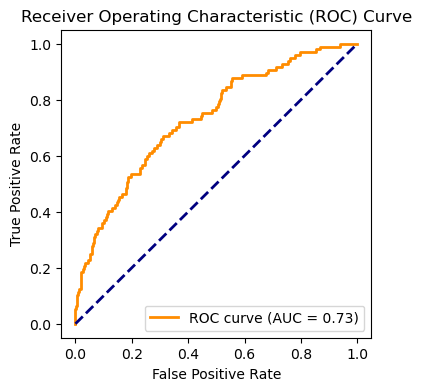

In [69]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
y_prob = LR.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print("ROC Area under the curve is: ",np.round(roc_auc,3))
# Plot ROC curve
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

AUC of 0.735 suggests that the model has a moderate level of discriminative ability, indicating it performs better than random guessing but has room for improvement 

## SVM-Classifier

In [70]:
from sklearn.svm import SVC
SVM_classifier=SVC(probability=True)

#Training model
SVM_classifier.fit(X_train,y_train)

#Prediction
SVM_Y_pred_train = SVM_classifier.predict(X_train)
SVM_Y_pred_test = SVM_classifier.predict(X_test)

### Evaluation of SVM model

In [71]:
# With accuracy Score
SVM_train_accuracy=accuracy_score(SVM_Y_pred_train,y_train)
print("SVM-Train accuracy",SVM_train_accuracy)
SVM_test_accuracy=accuracy_score(SVM_Y_pred_test,y_test)
print("SVM-test accuracy",SVM_test_accuracy)

SVM-Train accuracy 0.7517406440382942
SVM-test accuracy 0.6858407079646017


### Confusion Matrix for SVM

In [72]:
print("Confusion Matrix for SVM model Training Data : ")
print(confusion_matrix(SVM_Y_pred_train,y_train))
print()
print("Confusion Matrix for SVM model Testing Data : ")
print(confusion_matrix(SVM_Y_pred_test,y_test))


Confusion Matrix for SVM model Training Data : 
[[1589  432]
 [ 709 1866]]

Confusion Matrix for SVM model Testing Data : 
[[413  45]
 [168  52]]


### Recall Score for SVM-Classifier

In [73]:
recall_SVM_train=recall_score(y_train,y_pred_train)
print("Recall score for SVM model train data: ",recall_SVM_train)
#Recall for test data
recall_SVM_test=recall_score(y_test,y_pred_test)
print("Recall score for SVM model test data: ",recall_SVM_test)

Recall score for SVM model train data:  0.6993037423846823
Recall score for SVM model test data:  0.6494845360824743


### Classification Report for SVM

In [74]:
print("Classifiction report of Train data for SVM:")
print(classification_report(SVM_Y_pred_train,y_train))
print()
print("Classifiction report of test data for SVM:")
print(classification_report(SVM_Y_pred_test,y_test))

Classifiction report of Train data for SVM:
              precision    recall  f1-score   support

           0       0.69      0.79      0.74      2021
           1       0.81      0.72      0.77      2575

    accuracy                           0.75      4596
   macro avg       0.75      0.76      0.75      4596
weighted avg       0.76      0.75      0.75      4596


Classifiction report of test data for SVM:
              precision    recall  f1-score   support

           0       0.71      0.90      0.79       458
           1       0.54      0.24      0.33       220

    accuracy                           0.69       678
   macro avg       0.62      0.57      0.56       678
weighted avg       0.65      0.69      0.64       678



### ROC-AUC for SVM

ROC Area under the curve is:  0.6732260411306493


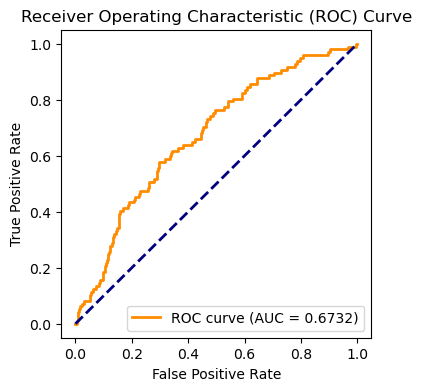

In [75]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
y_prob = SVM_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print("ROC Area under the curve is: ",roc_auc)
# Plot ROC curve
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

ROC Area under the curve 0.673208 suggests that Our model works better than the random guessing

## K-Nearest Neighbor classifier 

In [76]:
# Value of k is taken upto sqrt(n) where n is the number of data points in Training dataset
k_range=int(np.sqrt(len(X_train)))
print(k_range)


from sklearn.neighbors import KNeighborsClassifier


KNN_train_res=[]
KNN_test_res=[]

for k in range(1,k_range):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    
    knn_y_train_pred = knn.predict(X_train)
    knn_y_test_pred = knn.predict(X_test)
    
    train_recall= recall_score(knn_y_train_pred,y_train)
    KNN_train_res.append(train_recall)
    
    test_recall= recall_score(knn_y_test_pred,y_test)
    KNN_test_res.append(test_recall)
    
print(max(KNN_train_res))
print(max(KNN_test_res))

67
1.0
0.24299065420560748


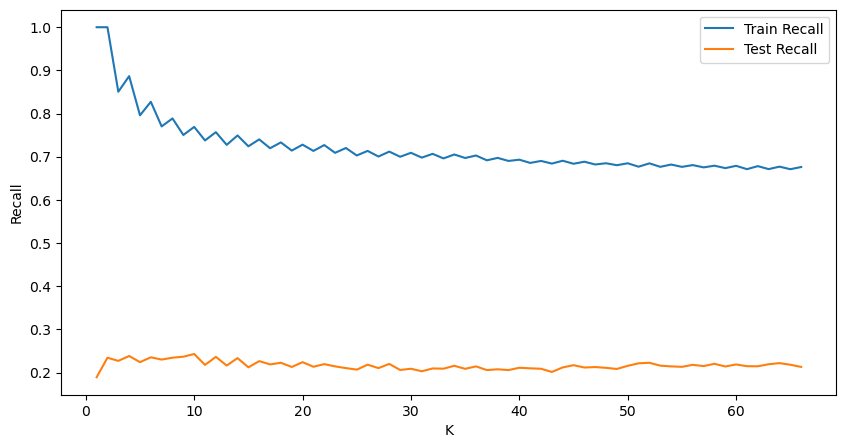

In [77]:
#Plotting test recall and train recall for different values of K
plt.figure(figsize=(10,5))
x = range(1,k_range)
y1 = KNN_train_res
y2 = KNN_test_res
plt.plot(x, y1, label='Train Recall')
plt.plot(x, y2, label = 'Test Recall')
plt.xlabel('K')
plt.ylabel('Recall')
plt.legend()
plt.show()

#### Optimum k=11

In [78]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)
    
knn_y_train_pred = knn.predict(X_train)
knn_y_test_pred = knn.predict(X_test)
    
train_recall= recall_score(knn_y_train_pred,y_train)    
test_recall= recall_score(knn_y_test_pred,y_test)

print("Recall for KNN trian data: ",train_recall)
print("Recall for KNN test data: ",test_recall)

print("Test Accuracy for knn: ", accuracy_score(knn_y_test_pred,y_test))
print("\n")
print("Confusion Matrix for KNN test data \n",confusion_matrix(knn_y_test_pred,y_test))
print("\n")
print("Classification Report for KNN test data")
print(classification_report(knn_y_test_pred,y_test))

Recall for KNN trian data:  0.7376993552765524
Recall for KNN test data:  0.21774193548387097
Test Accuracy for knn:  0.6504424778761062


Confusion Matrix for KNN test data 
 [[387  43]
 [194  54]]


Classification Report for KNN test data
              precision    recall  f1-score   support

           0       0.67      0.90      0.77       430
           1       0.56      0.22      0.31       248

    accuracy                           0.65       678
   macro avg       0.61      0.56      0.54       678
weighted avg       0.63      0.65      0.60       678



### ROC-AUC for KNN 

ROC Area under the curve is:  0.6488546232056356


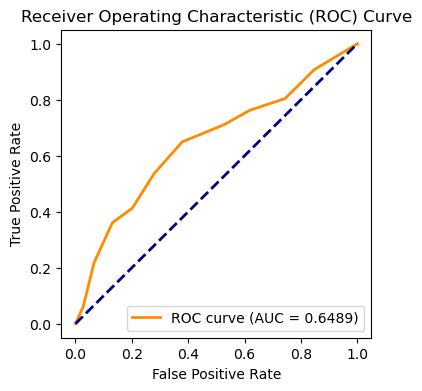

In [89]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
y_prob = knn.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print("ROC Area under the curve is: ",roc_auc)
# Plot ROC curve
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**Given the imbalance in our data 84.9% of 0 class and 15.1% of 1 class ensemble methods like Random Forest might be worth exploring. Random Forests can handle non-linear relationships and are robust to imbalanced datasets.**

# Random Forest Classifier

In [324]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=5, min_samples_leaf=2)

#Training Model
rfc.fit(X_train,y_train)

#predictions
rfc_train_ypred = rfc.predict(X_train)
rfc_test_ypred = rfc.predict(X_test)

### Evaluting The Random forest Classifier

In [325]:
# Checking accuracy
rfc_train_accu = accuracy_score(y_train,rfc_train_ypred )
print("RFC Training data Accuracy : ",rfc_train_accu)

print()
rfc_test_accu = accuracy_score(y_test,rfc_test_ypred)
print("RFC Testing data Accuracy : ",rfc_test_accu)

RFC Training data Accuracy :  0.7365100087032201

RFC Testing data Accuracy :  0.6917404129793511


### Confusion Matrix for RFC

In [326]:
print("Confusion Matrix for RFC model Training Data : ")
print(confusion_matrix(y_train,rfc_train_ypred))
print()
print("Confusion Matrix for RFC model Testing Data : ")
print(confusion_matrix(y_test,rfc_test_ypred))


Confusion Matrix for RFC model Training Data : 
[[1547  751]
 [ 460 1838]]

Confusion Matrix for RFC model Testing Data : 
[[408 173]
 [ 36  61]]


### Recall Score for Random Forest Classifier

In [327]:
#Recall for train data
recall_RFC_train=recall_score(y_train,rfc_train_ypred)
print("Recall score for RFC model train data: ",recall_RFC_train)

#Recall for test data
recall_RFC_test=recall_score(y_test,rfc_test_ypred)
print("Recall score for RFC model test data: ",recall_RFC_test)

Recall score for RFC model train data:  0.7998259355961705
Recall score for RFC model test data:  0.6288659793814433


### Classification report Random Forest Classifier

In [149]:
print("Classifiction report of Train data for RFC:")
print(classification_report(y_train,rfc_train_ypred))
print()
print("Classifiction report of test data for RFC:")
print(classification_report(y_test,rfc_test_ypred))

Classifiction report of Train data for RFC:
              precision    recall  f1-score   support

           0       0.77      0.67      0.72      2298
           1       0.71      0.80      0.75      2298

    accuracy                           0.73      4596
   macro avg       0.74      0.73      0.73      4596
weighted avg       0.74      0.73      0.73      4596


Classifiction report of test data for RFC:
              precision    recall  f1-score   support

           0       0.92      0.69      0.79       581
           1       0.26      0.64      0.37        97

    accuracy                           0.68       678
   macro avg       0.59      0.67      0.58       678
weighted avg       0.83      0.68      0.73       678



### ROC-AUC for RFC model

ROC Area under the curve is:  0.723


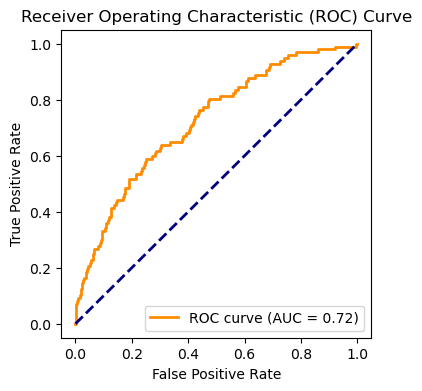

In [150]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
y_prob = rfc.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print("ROC Area under the curve is: ",np.round(roc_auc,3))
# Plot ROC curve
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# XGBoost 

In [80]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_classifier.fit(X_train, y_train)

xgb_train_ypred = xgb_classifier.predict(X_train)
xgb_test_ypred = xgb_classifier.predict(X_test)

### Evaluating XGB model

In [81]:
# With Accuracy score
xgb_train_accu = accuracy_score(y_train,xgb_train_ypred )
print("RFC Training data Accuracy : ",xgb_train_accu)

print()
xgb_test_accu = accuracy_score(y_test,xgb_test_ypred)
print("RFC Testing data Accuracy : ",xgb_test_accu)

RFC Training data Accuracy :  0.9936901653611836

RFC Testing data Accuracy :  0.8333333333333334


### Confusion matrix for XGB model

In [277]:
print("Confusion Matrix of Train data for XGB model : ")
print(confusion_matrix(y_train,xgb_train_ypred))
print()
print("Confusion Matrix of Test data for XGB model : ")
print(confusion_matrix(y_test,xgb_test_ypred))

Confusion Matrix of Train data for XGB model : 
[[2298    0]
 [  18 2280]]

Confusion Matrix of Test data for XGB model : 
[[534  47]
 [ 74  23]]


### Recall Score for XGB 

In [82]:
#Recall for train data
recall_XGB_train=recall_score(y_train,xgb_train_ypred)
print("Recall score for RFC model train data: ",recall_XGB_train)

#Recall for test data
recall_XGB_test=recall_score(y_test,rfc_test_ypred)
print("Recall score for RFC model test data: ",recall_XGB_test)

Recall score for RFC model train data:  0.9873803307223673
Recall score for RFC model test data:  0.6082474226804123


### Classification report for XGB

In [278]:
print("Classifiction report of Train data for XGB:")
print(classification_report(y_train,xgb_train_ypred))
print()
print("Classifiction report of test data for XGB:")
print(classification_report(y_test,xgb_test_ypred))

Classifiction report of Train data for XGB:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2298
           1       1.00      0.99      1.00      2298

    accuracy                           1.00      4596
   macro avg       1.00      1.00      1.00      4596
weighted avg       1.00      1.00      1.00      4596


Classifiction report of test data for XGB:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       581
           1       0.33      0.24      0.28        97

    accuracy                           0.82       678
   macro avg       0.60      0.58      0.59       678
weighted avg       0.80      0.82      0.81       678



### ROC-AUC curve for XGB 

ROC Area under the curve is:  0.6758876448356016


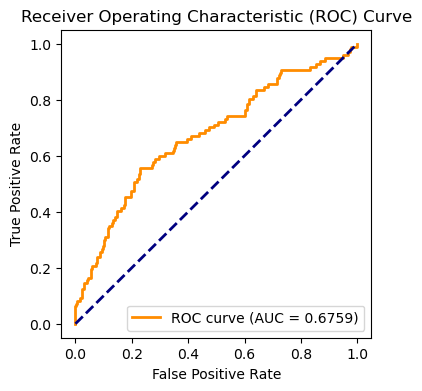

In [279]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
y_prob = xgb_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print("ROC Area under the curve is: ",roc_auc)
# Plot ROC curve
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Model Selection 

#### Considering Imbalance in our data set accuracy_score can not be the right metrics to meassure the performance. We can consider 'Recall_Score' as we working on a cardio vascular diseas False negatives are the real concern and ROC-AUC value to meassure the ability of model to Classify the data.

In [328]:
algorithms=['Logistic Regression', 'SVM Classifier','KNN Classifier','Random Forest Classifier', 'XGBoost Classifier']
Recall_Scores=[0.65,0.65,0.243,0.63,0.61]
ROC_AUC=[0.735,0.673,0.65,0.72,0.676]

Score_df = pd.DataFrame({
    'Algorithm': algorithms,  
    'Recall Score': Recall_Scores,  
    'ROC-AUC': ROC_AUC  
})
Score_df.head()

,Algorithm,Recall Score,ROC-AUC
0,Logistic Regression,0.650,0.735
1,SVM Classifier,0.650,0.673
2,KNN Classifier,0.243,0.650
3,Random Forest Classifier,0.630,0.720
4,XGBoost Classifier,0.610,0.676


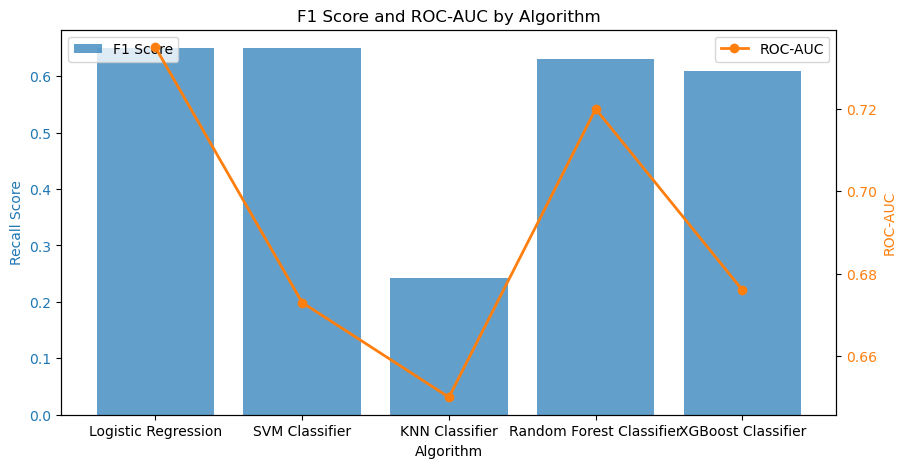

In [334]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot F1 Score on the primary y-axis
color = 'tab:blue'
ax1.set_xlabel("Algorithm")
ax1.set_ylabel("Recall Score", color=color)
ax1.bar(Score_df['Algorithm'], Score_df['Recall Score'], color=color, alpha=0.7, label='F1 Score')
ax1.tick_params(axis='y', labelcolor=color)

# Plot ROC-AUC on the secondary y-axis
ax2 = ax1.twinx()  # Create a second y-axis
color = 'tab:orange'
ax2.set_ylabel("ROC-AUC", color=color)
ax2.plot(Score_df['Algorithm'], Score_df['ROC-AUC'], color=color, linestyle='-', marker='o', linewidth=2, label='ROC-AUC')
ax2.tick_params(axis='y', labelcolor=color)

# Add titles and legends
plt.title("F1 Score and ROC-AUC by Algorithm")
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

## Summary of Algorithm Performance

| Algorithm                  | Recall Score | ROC-AUC   |
|----------------------------|--------------|-----------|
| Logistic Regression        | 0.650        | 0.735     |
| SVM Classifier             | 0.650        | 0.673     |
| KNN Classifier             | 0.243        | 0.650     |
| Random Forest Classifier   | 0.630        |  0.720    |
| XGBoost Classifier         | 0.610        | 0.676     |


## Conclusion:

Based on the evaluation results, Logistic Regression and Random Forest classifiers emerge as the top performers for this classification task, with relatively higher recall scores and ROC-AUC values compared to other models. However, there is still room for improvement in identifying positive cases, as indicated by the moderate recall scores across all algorithms.

## Recommendations:

1. **Collect More Data**: Increasing the size and diversity of the dataset by collecting more data could provide the models with additional information to learn from. A larger dataset may help capture more complex patterns and improve the generalization ability of the models..

2. **Hyperparameter Tuning**: Fine-tuning the hyperparameters of the models, especially for ensemble methods like Random Forest and XGBoost, could lead to improvements in performance. Grid search or random search techniques can be employed to identify the optimal combination of hyperparameters.

3. **Neural Networks**: Exploring the use of neural networks, especially deep learning architectures, could offer a powerful alternative to traditional machine learning models. Neural networks have the ability to capture complex relationships in the data and may yield improved performance with appropriate architecture design and hyperparameter tuning.

By incorporating these recommendations, it's possible to further refine the classification models and potentially achieve better performance in accurately identifying positive cases, which is crucial for the intended application.

